In [44]:
from IPython.display import clear_output
import gym as g
import random as rnd
import numpy as np
import time
from sklearn.preprocessing import KBinsDiscretizer
import math
import matplotlib.pyplot as plt

In [45]:
#Implement cartpole enviroment
env = g.make("CartPole-v1").env

In [46]:
#Printing Action and State space 
print(env.action_space)
print(env.observation_space)
print(env.observation_space.high)
print(env.observation_space.low)

Discrete(2)
Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]


In [47]:
#this function makes the choice to go left or right
def left_or_right(parameter,obs):
    if (np.matmul(parameter,obs) < 0):
        return 0
    else:
        return 1

In [48]:
#Function to run a single epsiode with Random values
def episode_run(env, parameter,timesteps):
    #We reset here to ensure its a random situation
    obs = env.reset() 
    
    #Initialize reward
    total_reward = 0
    
    #Loop through untill pole falls
    for i in range(timesteps):
        
        #Make the choice left or right
        choice = left_or_right(parameter,obs)
        obs, reward, done, info = env.step(choice)
        #Update total episode's reward after the action
        total_reward = total_reward + reward
        
        #Check if the pole is fallen after the timestep
        if (done == True):
            break
    
    return total_reward

In [49]:
def random_search():
    #Initialize variable to store reward and paramater.
    parameter = 0
    reward = 0

    #Loop through numbers of episode with random 
    #episode number
    episode_number = 1000  
    for i in range(episode_number):
        temp_parameter = np.random.rand(4)*2 - 1
        temp_reward = episode_run(env,temp_parameter,timesteps = 200)
        if (temp_reward > reward):

            #swap temp values in to full values
            parameter = temp_parameter
            reward = temp_reward
        #if 200 steps reached success
        if (temp_reward == 200):            
            #Return episode needed for success
            return i
            break
    print(parameter,reward)

In [50]:
results =[]

#Loop through 100 time of random search method
for i in range(100):
    results.append(random_search())
print("Average episode for success for 100 train times:",sum(results)/100)

Average episode for success for 100 train times: 13.53


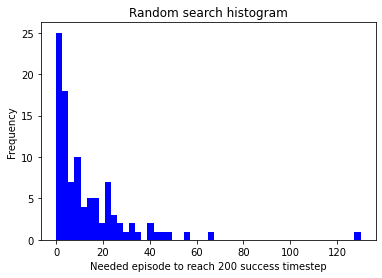

In [51]:
# plot results
plt.hist(results,50, facecolor='b')
plt.xlabel('Needed episode to reach 200 success timestep')
plt.ylabel('Frequency')
plt.title('Random search histogram')
plt.show()